In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive

In [2]:
num_image = 16
num_epoch = 4
eval_period = 1000
interpreter_list = ['ori', 'R_lrp_from', 'R_lrp_to', 'R_grad_from', 'R_grad_to', 'R_lrp34_from', 'R_lrp34_to']

In [3]:
class Result_viewer:
    def __init__(self, img_name, num_image, num_epoch, eval_period):
        self.img_name = img_name
        self.direc_path = './'+img_name+'/'
        self.num_image = num_image
        self.num_epoch = num_epoch
        self.eval_period = eval_period
        
    def save_img(self):
        
        
        direc_path = self.direc_path
        num_image = self.num_image
        num_epoch = self.num_epoch
        eval_period = self.eval_period
        
        l = len(interpreter_list)
        
        self.R_dict = {}
        
        for key in interpreter_list:
            self.R_dict[key] = []

        for epoch in range(num_epoch):
            for i, interpreter in enumerate(interpreter_list):
                for img_no in range(num_image):
                    file_name = interpreter + '_epoch'+str(epoch * eval_period) + '_no-'+str(img_no) + '.png'
                    im = plt.imread(direc_path+file_name)
                    self.R_dict[interpreter].append(im)
        
        for key in interpreter_list:
            self.R_dict[key] = self.to_arr(self.R_dict[key])
        print('Image load finished')
        
    def to_arr(self,x):
        return np.array(x).reshape(-1,num_image,224,224,3).transpose(0,1,3,2,4).reshape(-1,224*num_image,224,3).transpose(0,2,1,3)

    def load_img(self):
        direc_path = self.direc_path
        num_image = self.num_image
        num_epoch = self.num_epoch
        eval_period = self.eval_period
        
        l = len(interpreter_list)

        plt.figure(figsize=(10,10))
        plt.subplot(221)
        test_acc = np.load(direc_path + self.img_name + '_test_acc.npy')
        plt.title('test_acc')
        plt.plot(test_acc)

        plt.subplot(222)
        test_acc = np.load(direc_path + self.img_name + 'entropy_grad_R.npy')
        plt.title('entropy_grad')
        plt.plot(test_acc)

        plt.subplot(223)
        test_acc = np.load(direc_path + self.img_name + 'entropy_lrp34_R.npy')
        plt.title('entropy_lrp34')
        plt.plot(test_acc)

        plt.subplot(224)
        test_acc = np.load(direc_path + self.img_name + 'entropy_lrp_R.npy')
        plt.title('entropy_lrp')
        plt.plot(test_acc)
        plt.show()


    def show(self):
        direc_path = self.direc_path
        num_image = self.num_image
        num_epoch = self.num_epoch
        eval_period = self.eval_period
        
        def f(iter):
            i = iter// self.eval_period
            arr = []
            for key in interpreter_list:
                arr.append(self.R_dict[key][i])
            arr = np.array(arr)
            arr = arr.reshape(-1, 224*num_image, 3)
            
            plt.figure(figsize=(3*num_image,3*len(self.R_dict.keys())))
            plt.imshow(arr)
            plt.axis('off')
            plt.show()
            
            

        interactive_plot = interactive(f, iter = (0, (num_epoch-1)*eval_period, eval_period))
        output = interactive_plot.children[-1]
        output.layout.height = str(int(130*8/num_image*len(self.R_dict.keys())))+'px'
        return interactive_plot
        

In [4]:
img_name_list = []
for img_name in os.listdir('./'):
    if 'Active_' in img_name :
        img_name_list.append(img_name)
img_name_list.sort()
img_name_list

['Active_Densenet121_grad_cam64_active_lr_1e-05_lambda_10.0',
 'Active_Densenet121_lrp_T64_active_lr_1e-05_lambda_10.0',
 'Active_Resnet50_grad_cam19_active_lr_1e-05_lambda_10.0',
 'Active_Resnet50_lrp_T19_active_lr_1e-05_lambda_10.0',
 'Active_VGG19_grad_cam34_active_lr_1e-05_lambda_10.0',
 'Active_VGG19_lrp_T34_active_lr_1e-05_lambda_10.0']

0.744 0.736
0.744 0.712
0.764 0.732
0.764 0.716
0.756 0.692
0.756 0.696


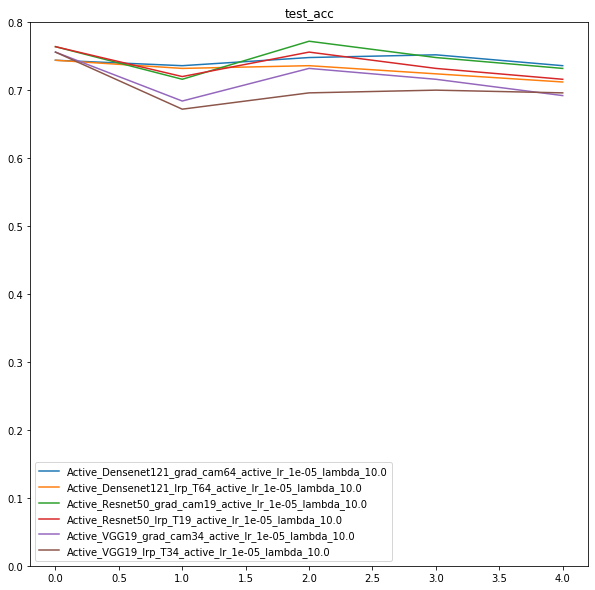

0.968 0.924
0.968 0.92
0.948 0.924
0.948 0.924
0.936 0.916
0.936 0.896


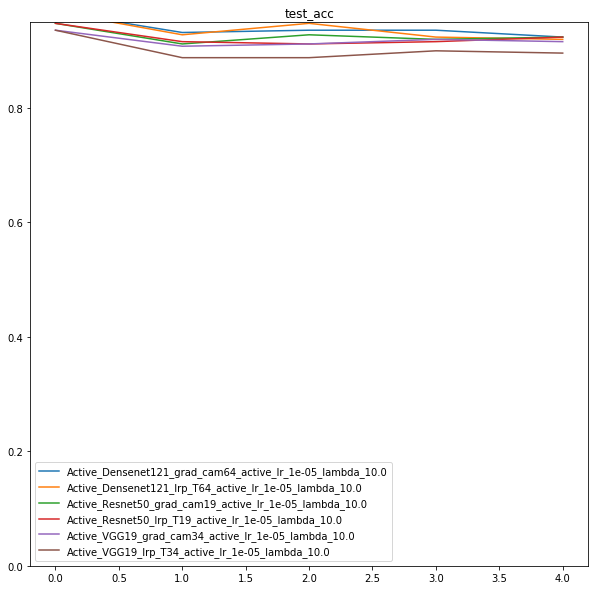

In [5]:

img_list = img_name_list

plt.figure(figsize=(10,10))
for img_name in img_list:
    try:
        direc_path = './'+img_name+'/'

        
        l = len(interpreter_list)

        test_acc = np.load(direc_path + img_name + '_test_acc1.npy')
        print(test_acc[0], test_acc[-1])
        plt.title('test_acc')
        plt.plot(test_acc, label=img_name)
    except:
        pass

plt.legend()
plt.ylim(0, 0.8)
plt.show()

plt.figure(figsize=(10,10))
for img_name in img_list:
    try:
        direc_path = './'+img_name+'/'

        l = len(interpreter_list)

        test_acc = np.load(direc_path + img_name + '_test_acc5.npy')
        print(test_acc[0], test_acc[-1])
        plt.title('test_acc')
        plt.plot(test_acc, label=img_name)
    except:
        pass


plt.legend()
plt.ylim(0, 0.95)
plt.show()

for img_name in img_list:
    try:
        direc_path = './'+img_name+'/'
        loss_c = np.load(direc_path + img_name + '_loss_c.npy')
        loss_r = np.load(direc_path + img_name + '_loss_r.npy')
        loss_t = np.load(direc_path + img_name + '_loss_t.npy')
        loss_dict = np.load(direc_path+img_name+'_loss_dict.npy').item()
        
        plt.figure(figsize=(12,4))
        plt.title(img_name)
        
        plt.subplot(131)
        plt.title('train_loss')
        plt.plot(loss_c, label='loss_c')
        plt.plot(loss_r, label='loss_r')
        plt.plot(loss_t, label='loss_t')
        plt.legend()
        
        plt.subplot(132)
        plt.title('test_loss')
        for key in loss_dict.keys():
            arr = np.array(loss_dict[key])
            means = arr.mean(axis=1)
            print(key, ['%.3f ' % k for k in means])
            plt.plot(means, label=key)
        plt.legend()
        
        plt.subplot(133)
        plt.title('threshold')
        for key in loss_dict.keys():
            arr = np.array(loss_dict[key])
            plt.plot((arr>threshold).mean(axis=1), label=key)
        plt.legend()
        
        print(loss_r[0], loss_r[-1])
        plt.legend()
        #plt.ylim(0, 0.92)
        plt.show()
    except:
        pass

In [6]:

class_dict = {}
error_list = []
for img_name in img_name_list:
    try:
        class_dict[img_name] = Result_viewer(img_name, num_image, num_epoch, eval_period)
        class_dict[img_name].save_img()
#         class_dict[img_name].load_img()
    except:
        error_list.append(img_name)
        

Image load finished
Image load finished
Image load finished
Image load finished
Image load finished
Image load finished


In [7]:
error_list

[]

# 4. visualize results

- LRP34_frame
- Grad_frame
- Grad_uniform
- Grad_softmax

In [8]:
img_lists = []
for img_name in img_name_list:
    
    img_lists.append(img_name)

In [9]:
interactor_list = []
for i, img_name in enumerate(img_lists):
    try:
        print(i, img_name)
        interactor_list.append(class_dict[img_name].show())
    except:
        pass

0 Active_Densenet121_grad_cam64_active_lr_1e-05_lambda_10.0
1 Active_Densenet121_lrp_T64_active_lr_1e-05_lambda_10.0
2 Active_Resnet50_grad_cam19_active_lr_1e-05_lambda_10.0
3 Active_Resnet50_lrp_T19_active_lr_1e-05_lambda_10.0
4 Active_VGG19_grad_cam34_active_lr_1e-05_lambda_10.0
5 Active_VGG19_lrp_T34_active_lr_1e-05_lambda_10.0


In [10]:
print(interpreter_list)
interactor_list[0]

['ori', 'R_lrp_from', 'R_lrp_to', 'R_grad_from', 'R_grad_to', 'R_lrp34_from', 'R_lrp34_to']


interactive(children=(IntSlider(value=1000, description='iter', max=3000, step=1000), Output(layout=Layout(hei…

In [11]:
print(interpreter_list)
interactor_list[1]

['ori', 'R_lrp_from', 'R_lrp_to', 'R_grad_from', 'R_grad_to', 'R_lrp34_from', 'R_lrp34_to']


interactive(children=(IntSlider(value=1000, description='iter', max=3000, step=1000), Output(layout=Layout(hei…

In [12]:
print(interpreter_list)
interactor_list[2]

['ori', 'R_lrp_from', 'R_lrp_to', 'R_grad_from', 'R_grad_to', 'R_lrp34_from', 'R_lrp34_to']


interactive(children=(IntSlider(value=1000, description='iter', max=3000, step=1000), Output(layout=Layout(hei…

In [13]:
print(interpreter_list)
interactor_list[3]

['ori', 'R_lrp_from', 'R_lrp_to', 'R_grad_from', 'R_grad_to', 'R_lrp34_from', 'R_lrp34_to']


interactive(children=(IntSlider(value=1000, description='iter', max=3000, step=1000), Output(layout=Layout(hei…

In [14]:
print(interpreter_list)
interactor_list[4]

['ori', 'R_lrp_from', 'R_lrp_to', 'R_grad_from', 'R_grad_to', 'R_lrp34_from', 'R_lrp34_to']


interactive(children=(IntSlider(value=3000, description='iter', max=3000, step=1000), Output(layout=Layout(hei…

In [15]:
print(interpreter_list)
interactor_list[5]


['ori', 'R_lrp_from', 'R_lrp_to', 'R_grad_from', 'R_grad_to', 'R_lrp34_from', 'R_lrp34_to']


interactive(children=(IntSlider(value=1000, description='iter', max=3000, step=1000), Output(layout=Layout(hei…